# Manipulating Data with Python - pandas

### Python's Data Science Ecosystem

In addition to Python's built-in modules, there are also many often-used third-party modules that are core tools for doing data science with Python.
Some of the most important ones are:

#### [``numpy``](http://numpy.org/): Numerical Python

Numpy is short for "Numerical Python", and contains tools for efficient manipulation of arrays of data.
If you have used other computational tools like IDL or MatLab, Numpy should feel very familiar.

#### [``scipy``](http://scipy.org/): Scientific Python

Scipy is short for "Scientific Python", and contains a wide range of functionality for accomplishing common scientific tasks, such as optimization/minimization, numerical integration, interpolation, and much more.
We will not look closely at Scipy today, but we will use its functionality later in the course.

#### [``pandas``](http://pandas.pydata.org/): Labeled Data Manipulation in Python

Pandas is short for "Panel Data", and contains tools for doing more advanced manipulation of labeled data in Python, in particular with a columnar data structure called a *Data Frame*.
If you've used the [R](http://rstats.org) statistical language (and in particular the so-called "Hadley Stack"), much of the functionality in Pandas should feel very familiar.

#### [``matplotlib``](http://matplotlib.org): Visualization in Python

Matplotlib started out as a Matlab plotting clone in Python, and has grown from there in the 15 years since its creation. It is the most popular data visualization tool currently in the Python data world (though other recent packages are starting to encroach on its monopoly).

### Installing Pandas & friends

Because the above packages are not included in Python itself, you need to install them separately. This can be done on the command line with ```conda```

```
$ conda install numpy scipy pandas matplotlib
```

and (so long as your conda setup is working) the packages will be downloaded and installed on your system.

### Loading Data with Pandas

Because we'll use certain packages (like ```pandas```) so much, we often import under a shortened name using the ``import ... as ...`` pattern:

In [1]:
import pandas as pd

Now we can use the ``read_csv`` command to read the comma-separated-value data:

In [11]:
df = pd.read_csv('../data/cb_go_output.csv')

*Note: strings in Python can be defined either with double quotes or single quotes*

### Viewing Pandas Dataframes

The ``head()`` and ``tail()`` methods show us the first and last rows of the data

In [12]:
df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes


In [13]:
df.columns

Index(['GO term', 'Description', 'P-value', 'FDR q-value',
       'Enrichment (N, B, n, b)', 'Genes'],
      dtype='object')

In [14]:
df.tail()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes
122,GO:0048701,embryonic cranial skeleton morphogenesis,0.000593,0.0355,"14.53 (2150,3,148,3)",[+] Show genes
123,GO:0098662,inorganic cation transmembrane transport,0.000665,0.0394,"7.04 (2150,13,141,6)",[+] Show genes
124,GO:0031100,animal organ regeneration,0.000708,0.0417,"107.50 (2150,8,5,2)",[+] Show genes
125,GO:0000463,maturation of LSU-rRNA from tricistronic rRNA ...,0.000837,0.0488,"6.41 (2150,11,183,6)",[+] Show genes
126,GO:0002429,immune response-activating cell surface recept...,0.000851,0.0493,"4.69 (2150,35,118,9)",[+] Show genes


The ``shape`` attribute shows us the number of elements:

In [15]:
df.shape

(127, 6)

The ``index`` attribute gives us the index names

In [16]:
df.index

RangeIndex(start=0, stop=127, step=1)

The ``dtypes`` attribute gives the data types of each column:

In [17]:
df.dtypes

GO term                     object
Description                 object
P-value                    float64
FDR q-value                float64
Enrichment (N, B, n, b)     object
Genes                       object
dtype: object

## 4. Manipulating data with ``pandas``

Access columns by name using square-bracket indexing:

In [18]:
df['Enrichment (N, B, n, b)']

0      4.48 (2150,115,263,63)
1       5.02 (2150,88,263,54)
2       4.63 (2150,90,294,57)
3      4.12 (2150,133,263,67)
4       4.65 (2150,88,294,56)
                ...          
122      14.53 (2150,3,148,3)
123      7.04 (2150,13,141,6)
124       107.50 (2150,8,5,2)
125      6.41 (2150,11,183,6)
126      4.69 (2150,35,118,9)
Name: Enrichment (N, B, n, b), Length: 127, dtype: object

Columns can be created (or overwritten) with the assignment operator.    

In [26]:
df['add_a_column'] = df['P-value']
df.head()

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,add_a_column
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,2.850000e-28
1,GO:0019083,viral transcription,2.100000e-27,7.720000e-24,"5.02 (2150,88,263,54)",[+] Show genes,2.100000e-27
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,2.650000e-27
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,2.990000e-27
4,GO:0006614,SRP-dependent cotranslational protein targetin...,5.960000e-27,8.760000e-24,"4.65 (2150,88,294,56)",[+] Show genes,5.960000e-27


Locate a cell using the ```.loc``` command

In [28]:
df.loc[3, 'FDR q-value']

5.5e-24

Sort values in a column

In [29]:
df.sort_values('FDR q-value')

,GO term,Description,P-value,FDR q-value,"Enrichment (N, B, n, b)",Genes,add_a_column
0,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",2.850000e-28,2.090000e-24,"4.48 (2150,115,263,63)",[+] Show genes,2.850000e-28
3,GO:0006413,translational initiation,2.990000e-27,5.500000e-24,"4.12 (2150,133,263,67)",[+] Show genes,2.990000e-27
7,GO:0045047,protein targeting to ER,6.370000e-27,5.850000e-24,"4.58 (2150,91,294,57)",[+] Show genes,6.370000e-27
2,GO:0006613,cotranslational protein targeting to membrane,2.650000e-27,6.500000e-24,"4.63 (2150,90,294,57)",[+] Show genes,2.650000e-27
6,GO:0072599,establishment of protein localization to endop...,6.370000e-27,6.690000e-24,"4.58 (2150,91,294,57)",[+] Show genes,6.370000e-27
...,...,...,...,...,...,...,...
122,GO:0048701,embryonic cranial skeleton morphogenesis,5.930000e-04,3.550000e-02,"14.53 (2150,3,148,3)",[+] Show genes,5.930000e-04
123,GO:0098662,inorganic cation transmembrane transport,6.650000e-04,3.940000e-02,"7.04 (2150,13,141,6)",[+] Show genes,6.650000e-04
124,GO:0031100,animal organ regeneration,7.080000e-04,4.170000e-02,"107.50 (2150,8,5,2)",[+] Show genes,7.080000e-04
125,GO:0000463,maturation of LSU-rRNA from tricistronic rRNA ...,8.370000e-04,4.880000e-02,"6.41 (2150,11,183,6)",[+] Show genes,8.370000e-04


Exercise: How would you the above sort by descending order?

## 5. Visualizing data with ``pandas``

Of course, looking at tables of data is not very intuitive.
Fortunately Pandas has many useful plotting functions built-in, all of which make use of the ``matplotlib`` library to generate plots.

Whenever you do plotting in the IPython notebook, you will want to first run this *magic command* which configures the notebook to work well with plots:

In [30]:
%matplotlib inline

Now we can simply call the ``plot()`` method of any series or dataframe to get a reasonable view of the data:

<Axes: >

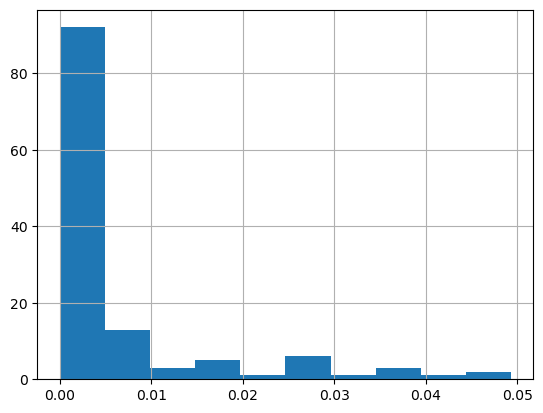

In [31]:
import matplotlib.pyplot as plt
df['FDR q-value'].hist()

### Other plot types

Pandas supports a range of other plotting types; you can find these by using the <TAB> autocomplete on the ``plot`` method: